In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coupe_1 = ['2.B53', '2.B54']
coupe_2 = ['2.B55', '2.B56']
coupe_3 = ['2.B57', '2.B58']
coupe_4 = ['2.B59', '2.B60']

coupes = [coupe_1, coupe_2, coupe_3, coupe_4]

kamer_1 = 'Data_clean/Alta_sensors/2P01_combined.xlsx'
kamer_2 = 'Data_clean/Alta_sensors/2P02_combined.xlsx'
kamer_3 = 'Data_clean/Alta_sensors/2P03_combined.xlsx'
kamer_4 = 'Data_clean/Alta_sensors/2P04_combined.xlsx'

kamers = [kamer_1, kamer_2, kamer_3, kamer_4]

Kamer P01 has 6034 datapoints with 146.33 as mean
Kamer P02 has 9836 datapoints with 154.71 as mean
Kamer P03 has 6740 datapoints with 159.58 as mean
Kamer P04 has 9810 datapoints with 179.55 as mean


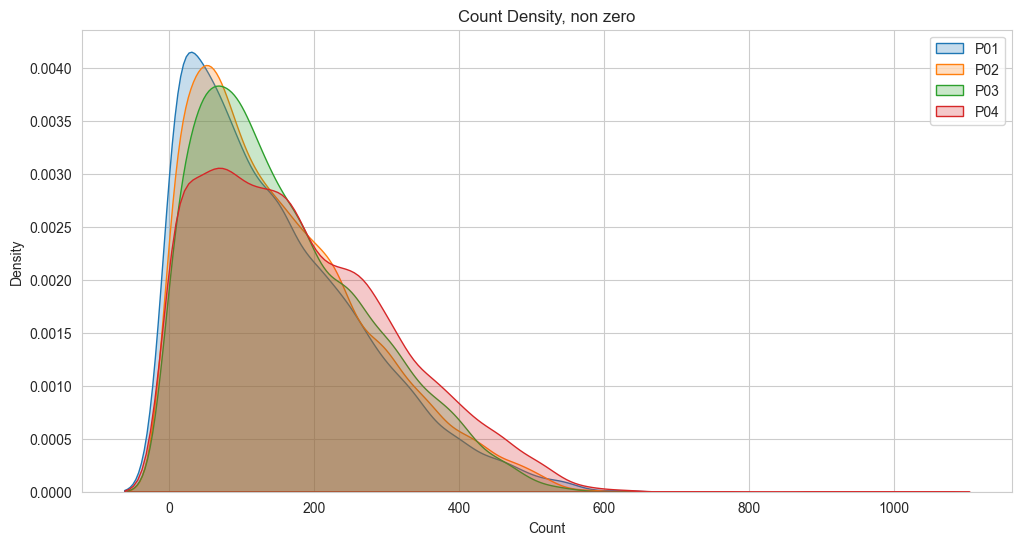

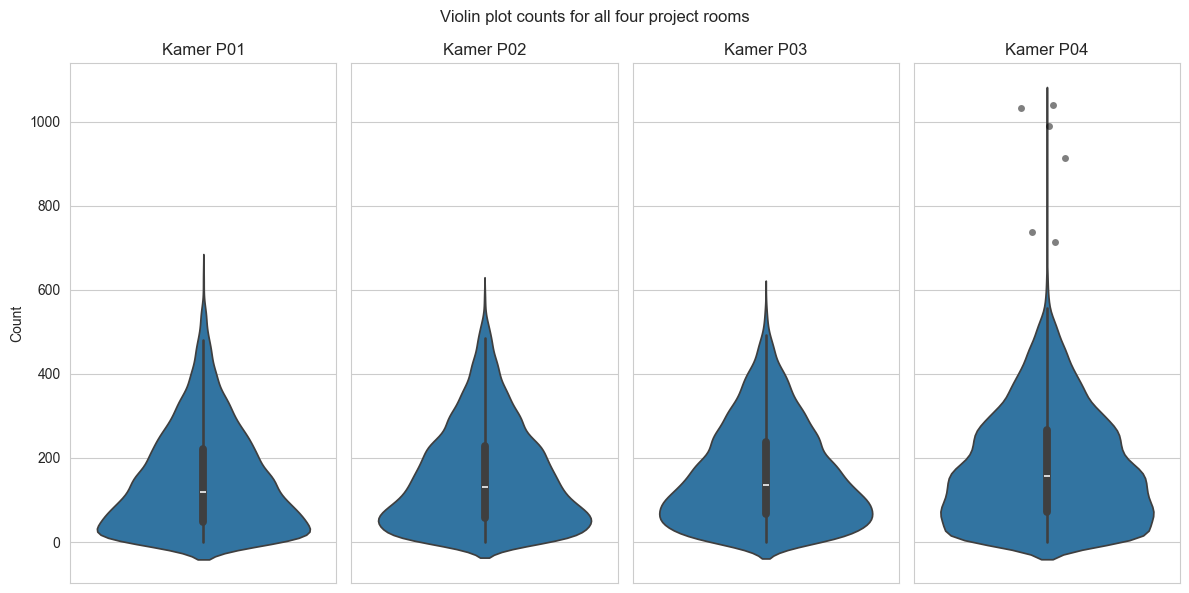

In [3]:
plt.figure(figsize=(12, 6))
for kamer in kamers:
    df = pd.read_excel(kamer)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]
    print(f"Kamer {kamer[25:28]} has {len(df)} datapoints with {df['Count'].mean():.2f} as mean")
    sns.kdeplot(df['Count'], label=kamer[25:28], fill=True)
    
plt.title('Count Density, non zero')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, len(kamers), figsize=(12, 6), sharey=True)
for i, kamer in enumerate(kamers):
    df = pd.read_excel(kamer)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]
    sns.violinplot(y='Count', data=df, ax=axes[i])
    axes[i].set_title(f'Kamer {kamer[25:28]}')
    axes[i].set_ylabel('Count')
    df_above_700 = df[df['Count'] > 700]
    sns.stripplot(y='Count', data=df_above_700, ax=axes[i], color='black', alpha=0.5)

plt.suptitle('Violin plot counts for all four project rooms')
plt.tight_layout()
plt.show()


In [4]:
df1 = pd.read_excel('Data_clean/Locus_sensors/2.B53_processed.xlsx')
df2 = pd.read_excel('Data_clean/Locus_sensors/2.B54_processed.xlsx')

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df1 = df1[(df1['Date'].dt.hour >= 8) & (df1['Date'].dt.hour <= 24)]
df2 = df2[(df2['Date'].dt.hour >= 8) & (df2['Date'].dt.hour <= 24)]
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

df1_resampled = df1.resample('5min').sum().fillna(0)
df2_resampled = df2.resample('5min').sum().fillna(0)

combined_df = pd.merge(df1_resampled, df2_resampled, left_index=True, right_index=True, suffixes=('_file1', '_file2'))

combined_df.reset_index(inplace=True)

combined_df.rename(columns={'index': 'Date'}, inplace=True)

combined_df.to_excel('Data_clean/Locus_sensors/coupe1_combined.xlsx')

In [5]:
combined_df.info

<bound method DataFrame.info of                      Date  Count_file1  Count_file2
0     2024-04-01 10:30:00          0.0          1.0
1     2024-04-01 10:35:00          0.0          0.0
2     2024-04-01 10:40:00          0.0          4.0
3     2024-04-01 10:45:00          0.0          0.0
4     2024-04-01 10:50:00          0.0          0.0
...                   ...          ...          ...
17149 2024-05-30 23:35:00         10.0         16.0
17150 2024-05-30 23:40:00         14.0         20.0
17151 2024-05-30 23:45:00         24.0         25.0
17152 2024-05-30 23:50:00          8.0         10.0
17153 2024-05-30 23:55:00         18.0         30.0

[17154 rows x 3 columns]>

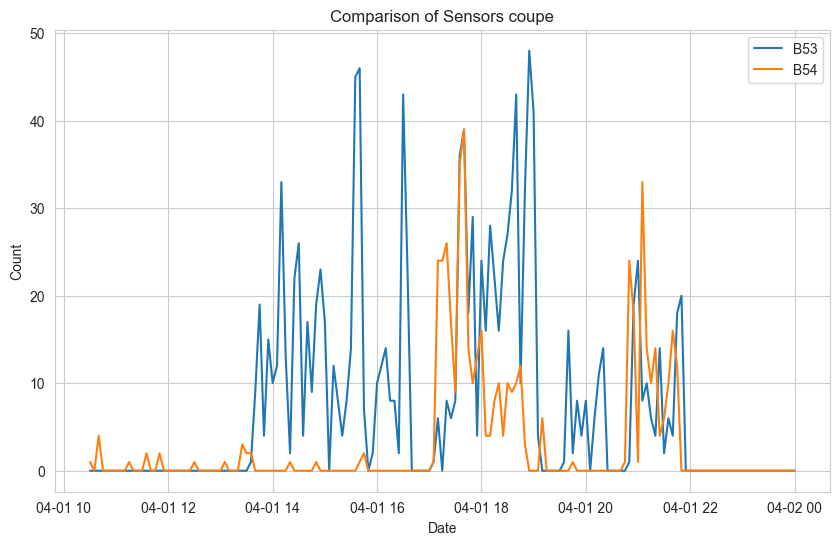

In [11]:
start_date = '2024-04-01'  
end_date = '2024-04-02' 
week_data = combined_df[(combined_df['Date'] >= start_date) & (combined_df['Date'] <= end_date)]


plt.figure(figsize=(10, 6))
plt.plot(week_data['Date'], week_data['Count_file1'], label='B53')
plt.plot(week_data['Date'], week_data['Count_file2'], label='B54')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparison of Sensors coupe')
plt.legend()
plt.grid(True)
plt.show()

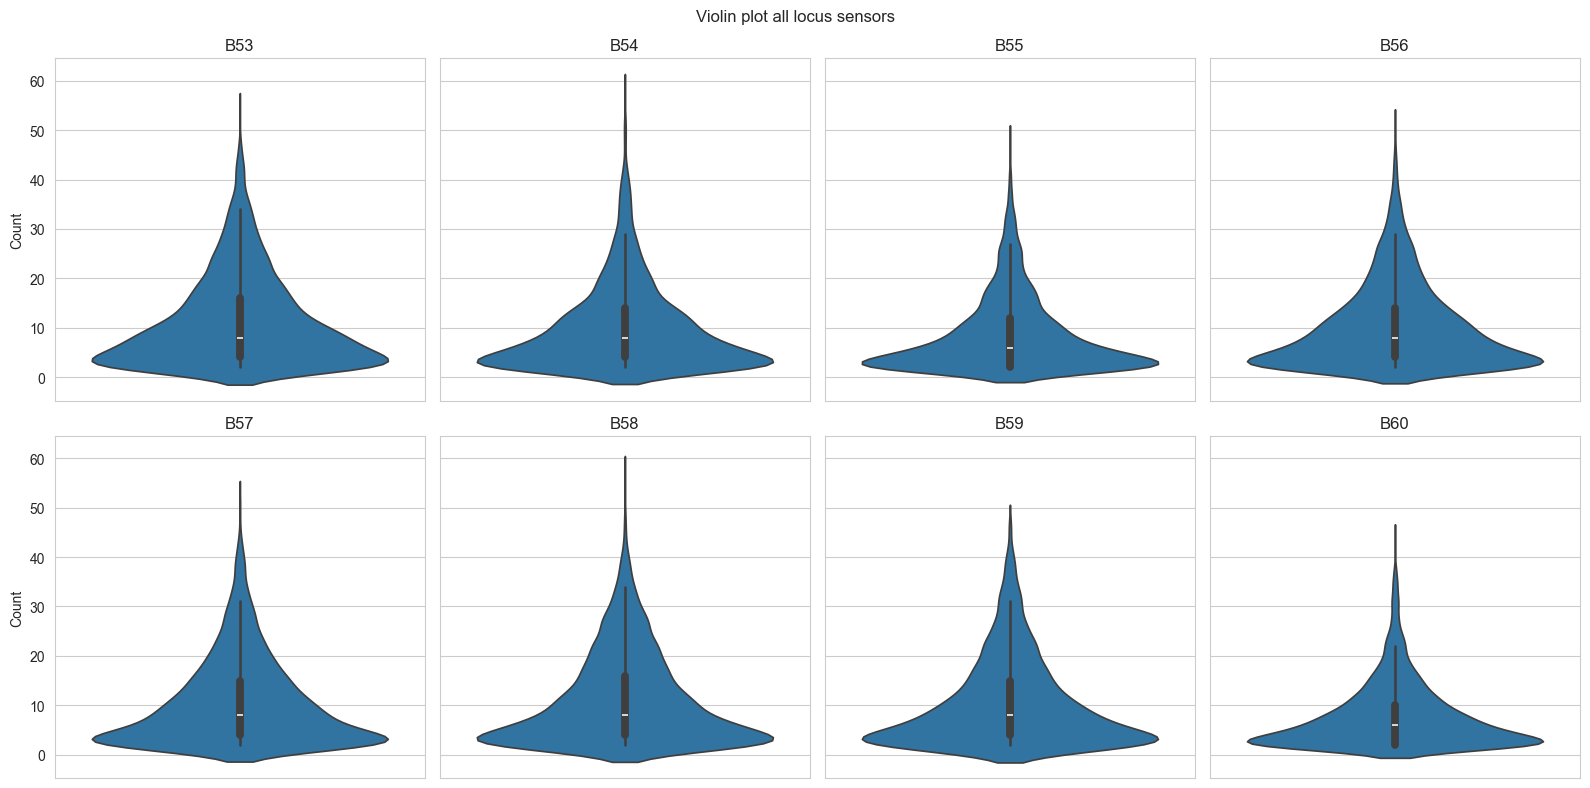

In [7]:
file_paths = ['Data_clean/Locus_sensors/2.B53_processed.xlsx', 'Data_clean/Locus_sensors/2.B54_processed.xlsx',
              'Data_clean/Locus_sensors/2.B55_processed.xlsx', 'Data_clean/Locus_sensors/2.B56_processed.xlsx',
              'Data_clean/Locus_sensors/2.B57_processed.xlsx', 'Data_clean/Locus_sensors/2.B58_processed.xlsx',
              'Data_clean/Locus_sensors/2.B59_processed.xlsx', 'Data_clean/Locus_sensors/2.B60_processed.xlsx',]
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for i, file_path in enumerate(file_paths):
    df = pd.read_excel(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = df[df['Count'] >=2]

    
    sns.violinplot(y='Count', data=df, ax=axes[i])
    axes[i].set_title(f'{file_path[27:30] }')
    axes[i].set_ylabel('Count')

plt.suptitle('Violin plot all locus sensors')
plt.tight_layout()
plt.show()